<a href="https://colab.research.google.com/github/BoboSamson/BoboSamson/blob/Samson/Lab1b_Samson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device
seed =1234

In [3]:
#Create a straight line data set with 100 points to given parameters

# Create *known* parameters
weight = 0.3
bias = 0.9

# Create data
start = 0
end = 2
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:50], y[:50]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.9000],
         [0.9060],
         [

In [4]:
#Split the dataset into train and test sets(80% : 20%)
torch.seed=44
train = int(0.8 * len(X))
X_train, y_train = X[:train], y[:train]
X_test, y_test = X[train:], y[train:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [5]:
print(f" First 5 rows for X_train is \n")

print(f" {X_train[:5]}\n")

 First 5 rows for X_train is 

 tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])



In [6]:
print(f" First 5 rows for y_train is \n")

print(f" {y_train[:5]}\n")

 First 5 rows for y_train is 

 tensor([[0.9000],
        [0.9060],
        [0.9120],
        [0.9180],
        [0.9240]])



In [7]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})



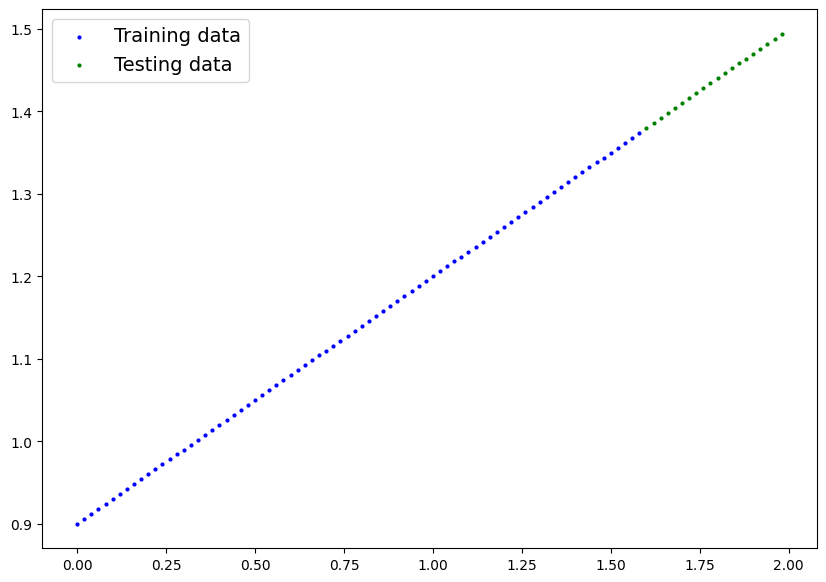

In [8]:
plot_predictions()

In [9]:
# Create a linear regression model with nn.Module subclass

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype=torch.float),
                                   requires_grad=True)

        self.bias = nn.Parameter(torch.randn(1,
                                            dtype=torch.float),
                                requires_grad=True)


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [10]:
torch.seed = 44

Model_A = LinearRegressionModel()

Model_A.state_dict()

OrderedDict([('weights', tensor([-0.2499])), ('bias', tensor([0.5288]))])

In [11]:
# Make predictions with model
with torch.inference_mode():
    y_preds = Model_A(X_test)



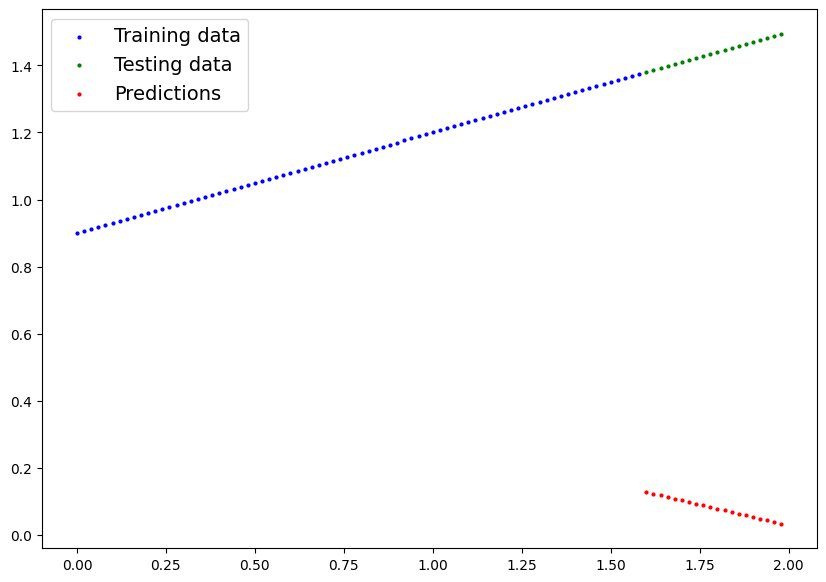

In [12]:
plot_predictions(predictions=y_preds)

In [13]:
y_test - y_preds

tensor([[1.2511],
        [1.2621],
        [1.2731],
        [1.2841],
        [1.2951],
        [1.3061],
        [1.3171],
        [1.3281],
        [1.3391],
        [1.3501],
        [1.3611],
        [1.3721],
        [1.3831],
        [1.3941],
        [1.4051],
        [1.4161],
        [1.4271],
        [1.4381],
        [1.4491],
        [1.4601]])

In [14]:
#Create loss function and optimise model patameters using nn.LlLoss
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=Model_A.parameters(), # parameters of target model to optimize
                            lr=0.01, weight_decay=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [15]:
torch.manual_seed(44)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 400

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    Model_A.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = Model_A(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    Model_A.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = Model_A(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 20 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.8056885600090027 | MAE Test Loss: 1.3314956426620483 
Epoch: 20 | MAE Train Loss: 0.4818388521671295 | MAE Test Loss: 0.8493447303771973 
Epoch: 40 | MAE Train Loss: 0.16206811368465424 | MAE Test Loss: 0.3713541030883789 
Epoch: 60 | MAE Train Loss: 0.04544864222407341 | MAE Test Loss: 0.10084053128957748 
Epoch: 80 | MAE Train Loss: 0.026210147887468338 | MAE Test Loss: 0.05138416960835457 
Epoch: 100 | MAE Train Loss: 0.0077399276196956635 | MAE Test Loss: 0.013963055796921253 
Epoch: 120 | MAE Train Loss: 0.013067452237010002 | MAE Test Loss: 0.0032517253421247005 
Epoch: 140 | MAE Train Loss: 0.010785679332911968 | MAE Test Loss: 0.006140679121017456 
Epoch: 160 | MAE Train Loss: 0.008508522063493729 | MAE Test Loss: 0.009023839607834816 
Epoch: 180 | MAE Train Loss: 0.006235945038497448 | MAE Test Loss: 0.011901115998625755 
Epoch: 200 | MAE Train Loss: 0.004223173949867487 | MAE Test Loss: 0.014013838954269886 
Epoch: 220 | MAE Train Loss: 0.00396370

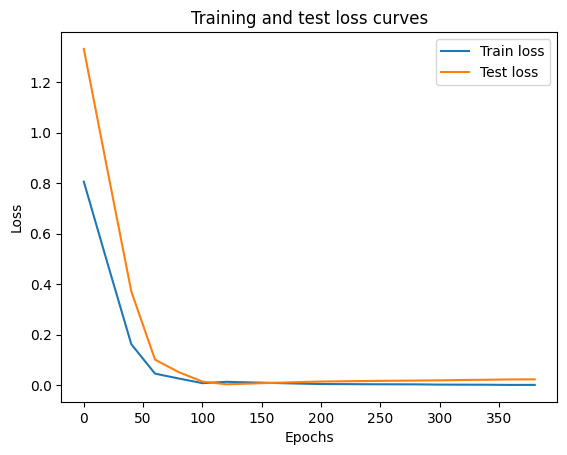

In [16]:
#Visualise the loss curves

# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [18]:
#The model's learned parameters

# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(Model_A.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.3001])), ('bias', tensor([0.9009]))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


In [19]:
#Make predictions


Model_A.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():

  y_preds = Model_A(X_test)
y_preds

tensor([[1.3812],
        [1.3872],
        [1.3932],
        [1.3992],
        [1.4052],
        [1.4112],
        [1.4172],
        [1.4232],
        [1.4292],
        [1.4352],
        [1.4412],
        [1.4472],
        [1.4532],
        [1.4592],
        [1.4652],
        [1.4712],
        [1.4772],
        [1.4832],
        [1.4892],
        [1.4952]])

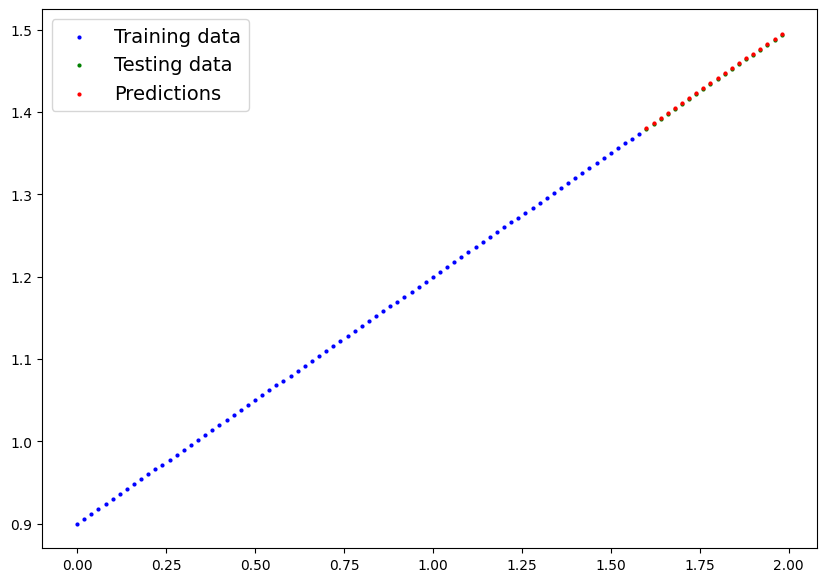

In [20]:
plot_predictions(predictions=y_preds)

In [21]:
#The model with epochs set at 400, shows that at 340 epochs there are no significant gains,


In [22]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=Model_A.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [23]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Feb 12 13:57 models/01_pytorch_workflow_model_0.pth


In [24]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-24-c3119fcaa06c>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [25]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [26]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])